Accuracy of Logistic Regression model on test data: 0.9659192825112107


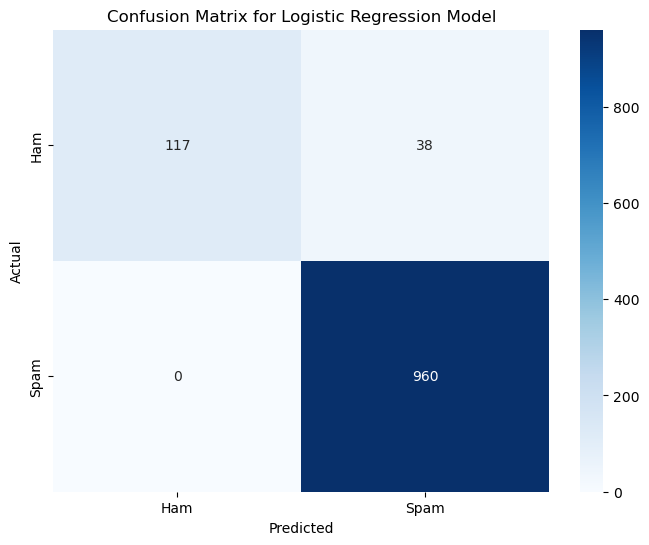

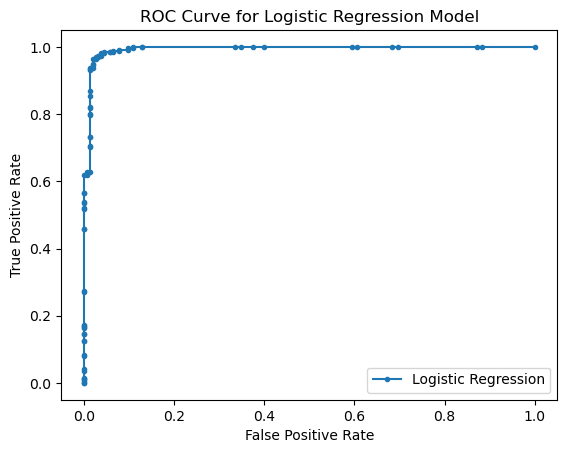

Accuracy of Random Forest model on test data: 0.9748878923766816


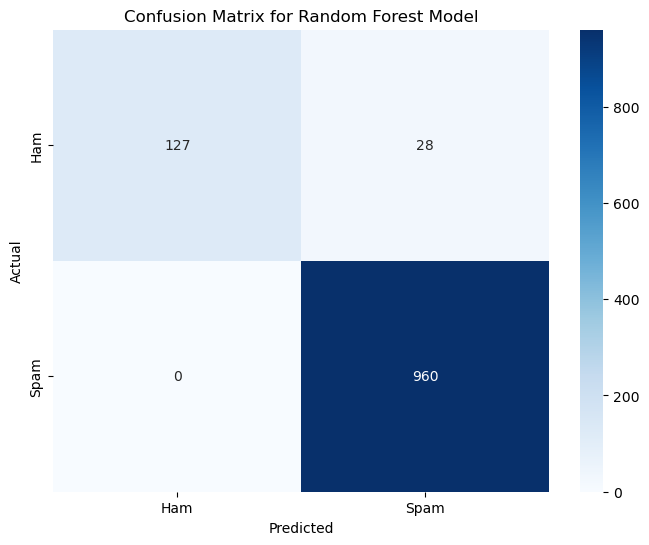

Accuracy of the Ensemble model on test data: 0.9713004484304932


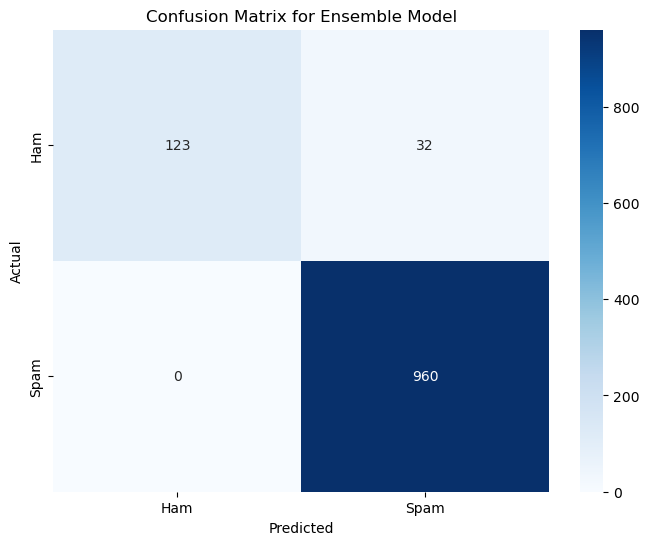

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Ham mail


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# In[3]:


# loading the data from csv file to a pandas DataFrame
raw_mail_data = pd.read_csv('mail_data.csv')


# In[4]:


mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')


# In[5]:


mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})


# In[6]:


X = mail_data['Message']
Y = mail_data['Category']


# In[7]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


# In[8]:


feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)


# In[9]:


X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


# In[10]:


# creating logistic regression model
logistic_model = LogisticRegression()


# In[11]:


# fitting the logistic regression model
logistic_model.fit(X_train_features, Y_train)


# In[12]:


# making predictions using logistic regression model
prediction_on_test_data_lr = logistic_model.predict(X_test_features)


# In[13]:


# calculating accuracy of the logistic regression model
accuracy_lr = accuracy_score(Y_test, prediction_on_test_data_lr)
print('Accuracy of Logistic Regression model on test data:', accuracy_lr)


# In[14]:


conf_matrix_lr = confusion_matrix(Y_test, prediction_on_test_data_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


# In[16]:


probs_lr = logistic_model.predict_proba(X_test_features)
probs_lr = probs_lr[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(Y_test, probs_lr)
plt.plot(fpr_lr, tpr_lr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve for Logistic Regression Model')
plt.show()


# In[17]:


# creating random forest model
random_forest_model = RandomForestClassifier()


# In[18]:


# fitting the random forest model
random_forest_model.fit(X_train_features, Y_train)


# In[19]:


# making predictions using random forest model
prediction_on_test_data_rf = random_forest_model.predict(X_test_features)


# In[20]:


# calculating accuracy of the random forest model
accuracy_rf = accuracy_score(Y_test, prediction_on_test_data_rf)
print('Accuracy of Random Forest model on test data:', accuracy_rf)


# In[21]:


conf_matrix_rf = confusion_matrix(Y_test, prediction_on_test_data_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


# In[22]:


ensemble_model = VotingClassifier(estimators=[('lr', logistic_model), ('rf', random_forest_model)], voting='soft')


# In[23]:


# fitting the ensemble model
ensemble_model.fit(X_train_features, Y_train)


# In[24]:


# making predictions using ensemble model
prediction_on_test_data_ensemble = ensemble_model.predict(X_test_features)


# In[25]:


# calculating accuracy of the ensemble model
accuracy_ensemble = accuracy_score(Y_test, prediction_on_test_data_ensemble)
print('Accuracy of the Ensemble model on test data:', accuracy_ensemble)


# In[26]:


conf_matrix_ensemble = confusion_matrix(Y_test, prediction_on_test_data_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()


# In[31]:


# print classification report for logistic regression model
classification_report_lr = classification_report(Y_test, prediction_on_test_data_lr)
print('Classification Report for Logistic Regression Model:')
print(classification_report_lr)


# In[32]:


input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)


# In[33]:


# making prediction using ensemble model
prediction = ensemble_model.predict(input_data_features)


# In[34]:


if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')


# In[ ]:






Accuracy of Logistic Regression model on test data: 0.9659192825112107


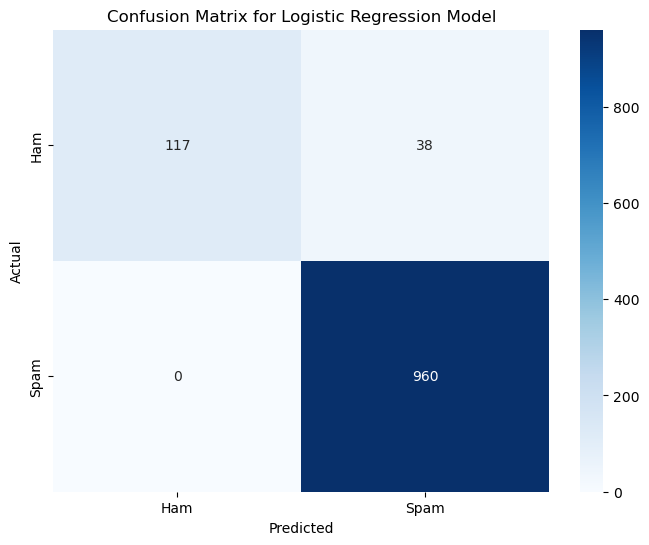

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



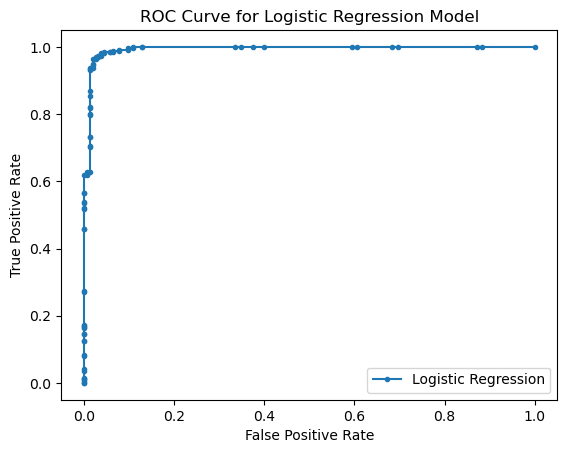

Accuracy of Random Forest model on test data: 0.9739910313901345


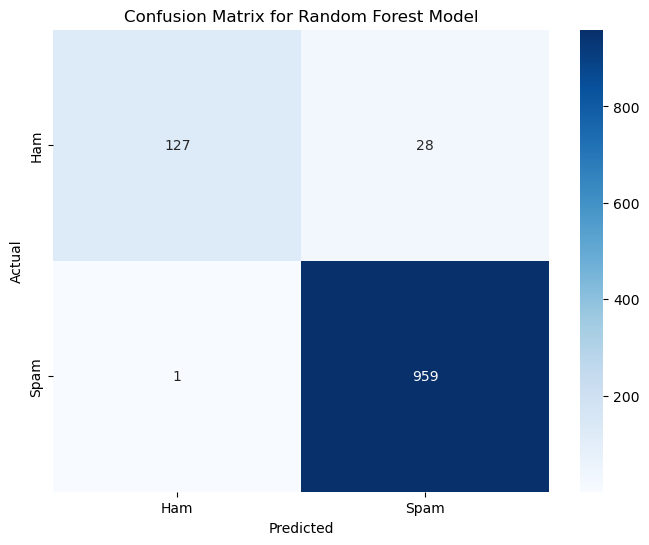

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       155
           1       0.97      1.00      0.99       960

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy of the Ensemble model on test data: 0.9713004484304932


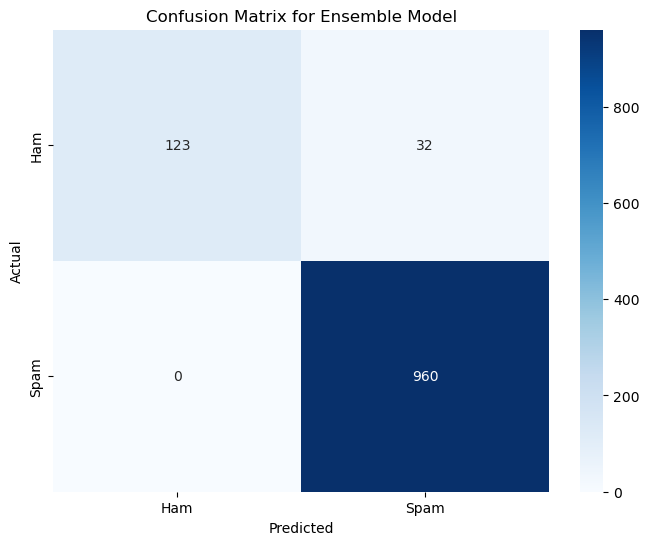

Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       155
           1       0.97      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Ham mail


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data from csv file to a pandas DataFrame
raw_mail_data = pd.read_csv('mail_data.csv')

# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

# mapping 'spam' to 0 and 'ham' to 1
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

X = mail_data['Message']
Y = mail_data['Category']

# splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# transform the text data to feature vectors using TF-IDF
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# creating logistic regression model
logistic_model = LogisticRegression()

# fitting the logistic regression model
logistic_model.fit(X_train_features, Y_train)

# making predictions using logistic regression model
prediction_on_test_data_lr = logistic_model.predict(X_test_features)

# calculating accuracy of the logistic regression model
accuracy_lr = accuracy_score(Y_test, prediction_on_test_data_lr)
print('Accuracy of Logistic Regression model on test data:', accuracy_lr)

# plot confusion matrix for logistic regression model
conf_matrix_lr = confusion_matrix(Y_test, prediction_on_test_data_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# print classification report for logistic regression model
classification_report_lr = classification_report(Y_test, prediction_on_test_data_lr)
print('Classification Report for Logistic Regression Model:')
print(classification_report_lr)

# ROC curve for logistic regression model
probs_lr = logistic_model.predict_proba(X_test_features)
probs_lr = probs_lr[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(Y_test, probs_lr)
plt.plot(fpr_lr, tpr_lr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve for Logistic Regression Model')
plt.show()

# creating random forest model
random_forest_model = RandomForestClassifier()

# fitting the random forest model
random_forest_model.fit(X_train_features, Y_train)

# making predictions using random forest model
prediction_on_test_data_rf = random_forest_model.predict(X_test_features)

# calculating accuracy of the random forest model
accuracy_rf = accuracy_score(Y_test, prediction_on_test_data_rf)
print('Accuracy of Random Forest model on test data:', accuracy_rf)

# plot confusion matrix for random forest model
conf_matrix_rf = confusion_matrix(Y_test, prediction_on_test_data_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# print classification report for random forest model
classification_report_rf = classification_report(Y_test, prediction_on_test_data_rf)
print('Classification Report for Random Forest Model:')
print(classification_report_rf)

# creating the ensemble model with soft voting
ensemble_model = VotingClassifier(estimators=[('lr', logistic_model), ('rf', random_forest_model)], voting='soft')

# fitting the ensemble model
ensemble_model.fit(X_train_features, Y_train)

# making predictions using ensemble model
prediction_on_test_data_ensemble = ensemble_model.predict(X_test_features)

# calculating accuracy of the ensemble model
accuracy_ensemble = accuracy_score(Y_test, prediction_on_test_data_ensemble)
print('Accuracy of the Ensemble model on test data:', accuracy_ensemble)

# plot confusion matrix for ensemble model
conf_matrix_ensemble = confusion_matrix(Y_test, prediction_on_test_data_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# print classification report for ensemble model
classification_report_ensemble = classification_report(Y_test, prediction_on_test_data_ensemble)
print('Classification Report for Ensemble Model:')
print(classification_report_ensemble)

# example input mail
input_mail = ["ewplrklvlmrktpkmvlervmkmkmkrrkfplrlmkmvkmvkokrmkbmwpop34-rrkf,pef-korkvorkkroj-=24ffmm3pflrmvmv;svlmvkmkvcvervmrmvlmvmevfkmvmvfkekpko3pkmvlmvp3kpfpmvlm3rvkvm3pmrpvmvmp vpvp3rmvrvl3rm3okvfkfmvk"]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction using ensemble model
prediction = ensemble_model.predict(input_data_features)

if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')